In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Objetivos de hoy
1. Operaciones básicas con vectores y matrices
2. Eliminación Gaussiana
3. Gauss-Jordan
4. Determinantes

In [28]:
#Vector
v=[1,3,5,7]
v=np.array(v)

print('Vector:',v)
print('Dimensión:',len(v))
print('Componente 1:',v[1])

Vector: [1 3 5 7]
Dimensión: 4
Componente 1: 3


In [29]:
#Matrices
A=[[1,2,3,4],
   [5,6,7,8],
   [9,10,11,12]]
A=np.array(A)

print('Matriz:')
print(A)

print('Filas:',len(A[:,1]))
print('Columnas:',len(A[1,:]))
print('Componente 2,1:',A[2,1] )
print('Fila 2:',A[2,:])
print('Columna 3:',A[:,3])

print('Transpuesta:')
print(np.transpose(A))

Matriz:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Filas: 3
Columnas: 4
Componente 2,1: 10
Fila 2: [ 9 10 11 12]
Columna 3: [ 4  8 12]
Transpuesta:
[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


# Matriz x Vector

$$(A \vec{v})_i=\sum_j A_{ij} v_j$$

$$i=0,1,2,...\text{# filas de A}$$
$$j=0,1,2,...\text{# columnas de A}$$

In [30]:
Av=np.zeros(len(A[:,0]))

for i in range(len(A[:,0])):
    for j in range(len(A[0,:])):
        Av[i]+=A[i,j]*v[j]


print('Multiplicación: ',Av)
print('Numpy:', np.dot(A,v))

Multiplicación:  [ 50. 114. 178.]
Numpy: [ 50 114 178]


# Graficar Campos vectoriales

#### Ejemplo

Graficar el campo eléctrico generado por una carga negativa estática en dos dimensiones, utilizar unidades reducidas

$$\vec{E}(\vec{r})=-\frac{1}{r^2} \hat{r}$$

$$\vec{E}(x,y) = -\frac{1}{x^2+y^2} \frac{x. \hat{i} + y. \hat{j}}{\sqrt{x^2+y^2}}=-\frac{x. \hat{i} + y. \hat{j}}{(x^2+y^2)^{3/2}}$$

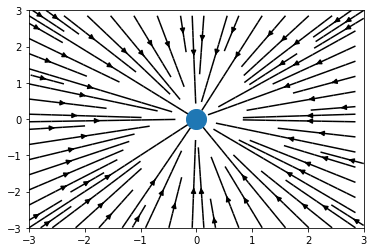

In [31]:
x=np.linspace(-3,3,100)
y=np.linspace(-3,3,100)

X,Y =np.meshgrid(x,y)

#print(X)
#print(Y)

Ex=-X/(X**2+Y**2)**(3/2)
Ey=-Y/(X**2+Y**2)**(3/2)

plt.plot(0,0,'o',markersize=20)
plt.streamplot(X,Y,Ex,Ey,color='black')
#plt.xlim(-3,3)
#plt.ylim(-3,3)
#plt.grid()

#### Ejemplo

Graficar el campo eléctrico generado por dos cargas estáticas separadas y cargas opuestas en dos dimensiones, utilizar unidades reducidas

$$\vec{E}(\vec{r})=-\frac{1}{(r-r_1)^{3}} (\vec{r}-\vec{r_1})+\frac{1}{(r-r_2)^{3}} (\vec{r}-\vec{r_2})$$

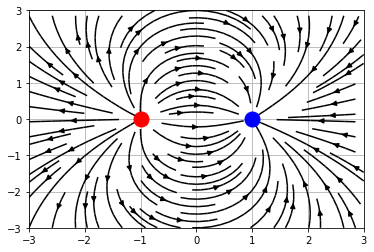

In [32]:
x=np.linspace(-3,3,100)
y=np.linspace(-3,3,100)

#Carga negativa
x1=1
y1=0

#Carga positiva
x2=-1
y2=0

X,Y=np.meshgrid(x,y)

Ex=(X-x2)/((X-x2)**2+(Y-y2)**2)**(3/2)-(X-x1)/((X-x1)**2+(Y-y1)**2)**(3/2)
Ey=(Y-y2)/((X-x2)**2+(Y-y2)**2)**(3/2)-(Y-y1)/((X-x1)**2+(Y-y1)**2)**(3/2)


plt.plot(x1,y1,'o',color='blue',markersize=15,label='-')
plt.plot(x2,y2,'o',color='red',markersize=15,label='+')
plt.streamplot(X,Y,Ex,Ey,color='black')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid()

# Operaciones básicas a matrices

Sea $A \in \mathcal{M}_{(m+1)\times(n+1)}(\mathbb{R})$ una matriz de $m+1$ filas y $n+1$ columnas con entradas reales.

$$A=\begin{bmatrix}
a_{00} & a_{01} & ... & a_{0n} \\
a_{10} & a_{11} & ... & a_{1n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m0} & a_{m1} & ... & a_{mn} \\
\end{bmatrix}$$

Sea $E_i$ la fila $i$-esima de la matriz 

$$E_i = \begin{bmatrix}
a_{i0} & a_{i1} & ... & a_{in}
\end{bmatrix}$$

In [33]:
A=[[1, 2, 1],
   [2, 4, 3],
   [3, 3, 1]]

A=np.array(A)

print(A)

[[1 2 1]
 [2 4 3]
 [3 3 1]]


##### 1. Multiplicación de una fila por un escalar

$$E_i \to \lambda E_i$$


In [34]:
def row_lamb(A,i, l):  
    B=np.copy(A)
    B=B.astype('float64')
    B[i,:]=l*B[i,:]
    return B

print('Matriz Original: \n',A)
print('Matriz Modificada: \n',row_lamb(A,2,1/3))

Matriz Original: 
 [[1 2 1]
 [2 4 3]
 [3 3 1]]
Matriz Modificada: 
 [[1.         2.         1.        ]
 [2.         4.         3.        ]
 [1.         1.         0.33333333]]


##### 2. Combinación de dos fílas

$$E_i \to E_i + \lambda E_j$$


In [35]:
def row_comb(A, i, j, l):
    B=np.copy(A)
    B=B.astype('float64')
    B[i,:]+=l*B[j,:]

    return B

print('Matriz Original: \n',A)
print('Matriz Modificada: \n',row_comb(A,2,0,-3))

Matriz Original: 
 [[1 2 1]
 [2 4 3]
 [3 3 1]]
Matriz Modificada: 
 [[ 1.  2.  1.]
 [ 2.  4.  3.]
 [ 0. -3. -2.]]


##### 3. Intercambio de dos fílas

$$ E_i \leftrightarrow E_j $$

In [36]:
def row_swap(A, i, j):
    B=np.copy(A)
    B=B.astype('float64')

    B[[i,j]]=B[[j,i]]
    return B

print('Matriz Original: \n',A)
print('Matriz Modificada: \n',row_swap(A,0,1))

Matriz Original: 
 [[1 2 1]
 [2 4 3]
 [3 3 1]]
Matriz Modificada: 
 [[2. 4. 3.]
 [1. 2. 1.]
 [3. 3. 1.]]


# Eliminación Gaussiana

Consiste en llevar la matriz a la forma

$$A'=\begin{bmatrix}
a'_{00} & a'_{01} & ... & a'_{0n} \\
0 & a'_{11} & ... & a'_{1n} \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & ... & 1 \\
\end{bmatrix}$$

In [37]:
B=np.copy(A)
print('Matriz Original \n', B)

B=row_comb(B,1,0,-2)
print('Primer paso \n', B)
B=row_comb(B,2,0,-3)
print('Segundo paso \n', B)
B=row_swap(B,1,2)
print('Tercer paso \n', B)

Matriz Original 
 [[1 2 1]
 [2 4 3]
 [3 3 1]]
Primer paso 
 [[1. 2. 1.]
 [0. 0. 1.]
 [3. 3. 1.]]
Segundo paso 
 [[ 1.  2.  1.]
 [ 0.  0.  1.]
 [ 0. -3. -2.]]
Tercer paso 
 [[ 1.  2.  1.]
 [ 0. -3. -2.]
 [ 0.  0.  1.]]


##### Solución a un sistema de ecuaciones lineales

Sea $x\in\mathbb{R}^n$ el vector de incognitas del sistema y $b\in\mathbb{R}^m$
$$A \vec{x} = \vec{b}$$

$$\begin{bmatrix}
a_{00} & a_{01} & ... & a_{0n} \\
a_{10} & a_{11} & ... & a_{1n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m0} & a_{m1} & ... & a_{mn} \\
\end{bmatrix} 
\begin{bmatrix}
x_0 \\
x_1 \\
\vdots \\
x_n
\end{bmatrix} =
\begin{bmatrix}
b_0 \\
b_1 \\
\vdots \\
b_m
\end{bmatrix}$$

El sistema se puede solucionar utilizando eliminación Gaussiana aumentando la matriz

$$[A\vdots \vec{b}]$$

$$\begin{bmatrix}
a_{00} & a_{01} & ... & a_{0n} & \vdots & b_0 \\
a_{10} & a_{11} & ... & a_{1n} & \vdots & b_1 \\
\vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
a_{m0} & a_{m1} & ... & a_{mn} & \vdots & b_m \\
\end{bmatrix} $$

In [38]:
b=[1,2,3]
b=np.array(b)
B=np.copy(A)
print('Matriz Original \n', B)
print('Vector Original \n', b)

B=np.c_[B,b]
print('Matriz aumentada \n', B)

B=row_comb(B,1,0,-2)
print('Primer paso \n', B)
B=row_comb(B,2,0,-3)
print('Segundo paso \n', B)
B=row_swap(B,1,2)
print('Tercer paso \n', B)

Matriz Original 
 [[1 2 1]
 [2 4 3]
 [3 3 1]]
Vector Original 
 [1 2 3]
Matriz aumentada 
 [[1 2 1 1]
 [2 4 3 2]
 [3 3 1 3]]
Primer paso 
 [[1. 2. 1. 1.]
 [0. 0. 1. 0.]
 [3. 3. 1. 3.]]
Segundo paso 
 [[ 1.  2.  1.  1.]
 [ 0.  0.  1.  0.]
 [ 0. -3. -2.  0.]]
Tercer paso 
 [[ 1.  2.  1.  1.]
 [ 0. -3. -2.  0.]
 [ 0.  0.  1.  0.]]


El sistema de ecuaciones lineales reducido queda como
$$\begin{align}
x_2&=0 \\
-3x_1-2x_2&=0 \\
x_0 + 2x_1 + x_2 &=  1
\end{align}
$$

La solución es:

$$
\begin{align}
x_0&=1 \\
x_1&=0 \\
x_2 &=  0
\end{align}$$

# Algoritmo general

1. Entregar la matriz $A$
2. Buscar la posición del primer pivote $a_{i1}\neq0$
3. Aplicar el itercambio $E_1 \leftrightarrow E_i$
4. Aplicar la combinación $E_i \to E_i- \frac{a_{i1}}{a_{11}}E_1$
5. Repetir hasta obtener la forma diagonal
6. Aplicar la multiplicación $E_m \to \frac{1}{a_{mn}} E_m$

In [39]:
def Gauss(A):
    B=np.copy(A)

    m=len(B[:,0])
    n=len(B[0,:])

    k=min([m,n])

    for j in range(k):
        for i in range(j,m):

            if B[i,j]!=0:
                break

        B=row_swap(B,i,j)

        if B[j,j]==0:
            continue

        for i in range(j+1,m):
            B=row_comb(B,i,j,-B[i,j]/B[j,j])

    if B[j,j]!=0:
        B=row_lamb(B,j,1/B[j,j])


    return B

print('Original: \n',A)
print('Eliminación Gaussiana: \n',Gauss(A))
print('-------------------------------------------')
print('Vector: \n',b)
print('Aumentada: \n', np.c_[A,b])
print('Eliminación Gaussiana: \n',Gauss(np.c_[A,b]))

Original: 
 [[1 2 1]
 [2 4 3]
 [3 3 1]]
Eliminación Gaussiana: 
 [[ 1.  2.  1.]
 [ 0. -3. -2.]
 [ 0.  0.  1.]]
-------------------------------------------
Vector: 
 [1 2 3]
Aumentada: 
 [[1 2 1 1]
 [2 4 3 2]
 [3 3 1 3]]
Eliminación Gaussiana: 
 [[ 1.  2.  1.  1.]
 [ 0. -3. -2.  0.]
 [ 0.  0.  1.  0.]]


# Encontrar la solución

En Matrices cuadradas $m=n$

$$A'=\begin{bmatrix}
a'_{00} & a'_{01} & ... & a'_{0n} & \vdots & b'_0 \\
0 & a'_{11} & ... & a'_{1n} & \vdots & b'_1 \\
\vdots & \vdots & \ddots & \vdots & \vdots & \vdots\\
0 & 0 & ... & 1 & \vdots & b'_n\\
\end{bmatrix}$$

La solución se puede despejar así:

$$\begin{align}
x_n&=b'_n \\
x_{n-1}&=\frac{b'_{n-1}-a'_{(n-1)n}x_n}{a'_{(n-1)(n-1)}} \\
& \vdots \\
x_i &= \frac{b'_i-\sum_{j=i+1}^{n} a'_{ij}x_j}{a'_{ii}}
\end{align}$$

Con $i=n-1,n-2, ... 0$. Este método se le conoce como $\textbf{Sustitución Regresiva}$

In [49]:
def Gauss_Solve(A,b):
    
    m=len(A[:,0]) #Número filas
    n=len(A[0,:]) #Número columnas
    
    G=Gauss(np.c_[A,b])
    
    Ap=G[:,0:n]
    bp=G[:,-1]
    
    x=np.zeros(m)
    
    for i in range(n-1,0-1,-1):
        if Ap[i,i]==0:
            x[i]=2 #se puede modificar
            print('Alerta matriz LD')
        else:
        
            x[i]=(bp[i]-sum(Ap[i,i+1:n]*x[i+1:n]))/(Ap[i,i])
        
    return x

print('Aumentada: \n', np.c_[A,b])
print('Eliminación Gaussiana: \n',Gauss(np.c_[A,b]))
print('Solución: \n', Gauss_Solve(A,b))

x=Gauss_Solve(A,b)
print('Ax-b: \n',np.dot(A,x)-b)

Aumentada: 
 [[-1  1 -5 ... -4 -3 -1]
 [ 4  2 -3 ...  4  3  0]
 [ 0 -4  4 ... -5  1  2]
 ...
 [ 4 -4  0 ...  1 -1 -4]
 [-3 -3  2 ... -4 -3 -2]
 [-2  4 -2 ...  3  2 -5]]
Eliminación Gaussiana: 
 [[-1.00000000e+00  1.00000000e+00 -5.00000000e+00 ... -4.00000000e+00
  -3.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  6.00000000e+00 -2.30000000e+01 ... -1.20000000e+01
  -9.00000000e+00 -4.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.13333333e+01 ... -1.30000000e+01
  -5.00000000e+00 -6.66666667e-01]
 ...
 [ 0.00000000e+00  0.00000000e+00  2.34413721e-15 ...  2.88704205e-01
  -5.72003944e+00 -2.25813002e-01]
 [ 0.00000000e+00  0.00000000e+00  2.28882820e-15 ... -2.09532145e+00
   1.81756878e+01 -1.72848774e+00]
 [-0.00000000e+00 -0.00000000e+00  2.11976224e-16 ... -0.00000000e+00
   1.00000000e+00  1.56205572e-01]]
Solución: 
 [-6.18632486e-02 -1.30957478e+00 -1.27959001e+00  5.95909035e-01
 -1.20871684e+00  1.26345292e+00 -1.66257234e-01  8.98572027e-03
  8.46802828e-01  6.37454950

In [52]:
A=np.array(
[[1,1,1],
  [2,2,2],
  [3,3,3],])

b=[1,2,3]
b=np.array(b)


print('Aumentada: \n', np.c_[A,b])
print('Eliminación Gaussiana: \n',Gauss(np.c_[A,b]))
x=Gauss_Solve(A,b)
print('Solución: \n', x)
print('Ax-b: \n',np.dot(A,x)-b)

Aumentada: 
 [[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]
Eliminación Gaussiana: 
 [[1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Alerta matriz LD
Alerta matriz LD
Solución: 
 [-3.  2.  2.]
Ax-b: 
 [0. 0. 0.]


Solución: 
 [-0.39541645 -0.91433961 -0.91819328 -0.2289174   0.66479646 -1.46125995
  2.52048803  1.56753089 -0.8164616  -0.36940837 -0.2793649   1.53947742
 -0.14229241  2.1651615  -1.04600172 -1.2467336   1.43352064 -0.12952485
 -0.26088937  1.63459485  1.2832222  -0.43471764 -1.41073181  0.25414771
  0.04016525 -0.46238982  0.50689216  3.10905824  0.72131794  1.15354214
  0.06751782  1.35332603  1.49114252  1.19176388  0.70699711 -0.84316741
 -1.33293661 -0.13185997 -0.36103197  1.35504545 -0.86981812  0.43058837
  1.13604249 -0.7893235   0.36865032 -1.23845456 -0.61395177 -0.12232882
 -0.58085335  0.81673843  1.05196447  0.22855292 -0.97093274 -2.15166007
 -2.21113366  0.26085151  1.08201692  0.02494619 -2.07785342  2.11510886
  0.41948443 -1.1631417  -0.61492455 -0.52093985  0.14906998 -0.41804121
  1.02222008 -0.66980053 -0.04604875  1.11223668 -0.61809265  1.33529339
  1.25682505 -2.01929619 -0.06707871  1.49530618  0.3058831  -0.65011721
  0.17620291  1.82155425  2.09050931  0

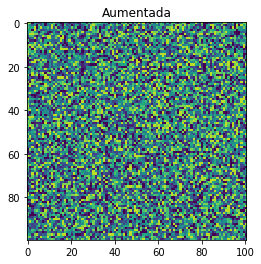

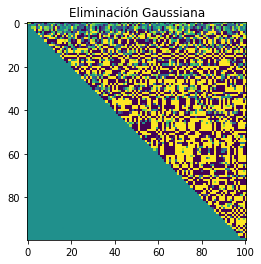

In [56]:
n=100
A=np.random.randint(-5,5,(n,n))
b=np.random.randint(-5,5,n)

plt.figure()
plt.title('Aumentada')
plt.imshow(np.c_[A,b],vmin=-5,vmax=5)

plt.figure()
plt.title('Eliminación Gaussiana')
plt.imshow(Gauss(np.c_[A,b]),vmin=-5,vmax=5)


print('Solución: \n', Gauss_Solve(A,b))

x=Gauss_Solve(A,b)
print('Ax-b: \n',np.dot(A,x)-b)

# Gauss-Jordan

Consiste en llevar la matriz a la forma

$$A'=\begin{bmatrix}
1 & 0 & ... & 0 \\
0 & 1 & ... & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & ... & 1 \\
\end{bmatrix}$$

In [57]:
A=[[1, 2, 1],
   [2, 4, 3],
   [3, 3, 1]]
b=[1,2,3]

A=np.array(A)
b=np.array(b)

In [60]:
def GaussJordan(A):
    B=np.copy(A)

    m=len(B[:,0])
    n=len(B[0,:])

    k=min([m,n])

    for j in range(k):
        for i in range(j,m):

            if B[i,j]!=0:
                break

        B=row_swap(B,i,j)

        if B[j,j]==0:
            continue

        for i in range(0,m):
            if i==j:
                continue
                
            B=row_comb(B,i,j,-B[i,j]/B[j,j])
            

        if B[j,j]!=0:
            B=row_lamb(B,j,1/B[j,j])

            
    return B

print('Original: \n',A)
print('Gauss Jordan: \n',GaussJordan(A))
print('-------------------------------------------')
print('Vector: \n',b)
print('Aumentada: \n', np.c_[A,b])
print('Eliminación Gauss-Jordan: \n',GaussJordan(np.c_[A,b]))

Original: 
 [[1 2 1]
 [2 4 3]
 [3 3 1]]
Gauss Jordan: 
 [[ 1.  0.  0.]
 [-0.  1.  0.]
 [ 0.  0.  1.]]
-------------------------------------------
Vector: 
 [1 2 3]
Aumentada: 
 [[1 2 1 1]
 [2 4 3 2]
 [3 3 1 3]]
Eliminación Gauss-Jordan: 
 [[ 1.  0.  0.  1.]
 [-0.  1.  0. -0.]
 [ 0.  0.  1.  0.]]


In [61]:
def GaussJordan_Solve(A,b):
    G=GaussJordan(np.c_[A,b])
    
    x=G[:,-1]
    
    return x

print('Aumentada: \n', np.c_[A,b])
print('Gauss Jordan: \n',GaussJordan(np.c_[A,b]))
x=GaussJordan_Solve(A,b)
print('Solución: \n', x)
print('Ax-b: \n',np.dot(A,x)-b)

Aumentada: 
 [[1 2 1 1]
 [2 4 3 2]
 [3 3 1 3]]
Gauss Jordan: 
 [[ 1.  0.  0.  1.]
 [-0.  1.  0. -0.]
 [ 0.  0.  1.  0.]]
Solución: 
 [ 1. -0.  0.]
Ax-b: 
 [0. 0. 0.]


# Matriz Inversa

Aplicamos Gauss-Jordan a la matriz aumentada con la identidad $I$

$$[A\vdots I]$$

Aumentada: 
 [[1. 2. 1. 1. 0. 0.]
 [2. 4. 3. 0. 1. 0.]
 [3. 3. 1. 0. 0. 1.]]
Gauss Jordan: 
 [[ 1.          0.          0.         -1.66666667  0.33333333  0.66666667]
 [-0.          1.          0.          2.33333333 -0.66666667 -0.33333333]
 [ 0.          0.          1.         -2.          1.          0.        ]]
Inversa: 
 [[-1.66666667  0.33333333  0.66666667]
 [ 2.33333333 -0.66666667 -0.33333333]
 [-2.          1.          0.        ]]


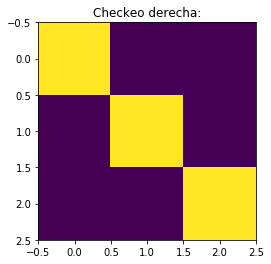

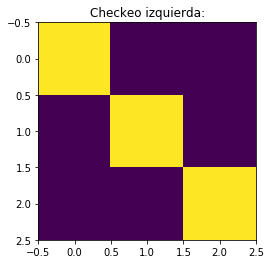

In [64]:
I=np.identity(3)
print('Aumentada: \n', np.c_[A,I])

GJ = GaussJordan(np.c_[A,I])
print('Gauss Jordan: \n', GJ)

Ainv=GJ[:,-3:]
print('Inversa: \n',Ainv)

plt.figure()
plt.title('Checkeo derecha:')
plt.imshow(np.dot(A,Ainv))

plt.figure()
plt.title('Checkeo izquierda:')
plt.imshow(np.dot(Ainv,A))

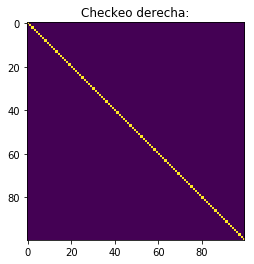

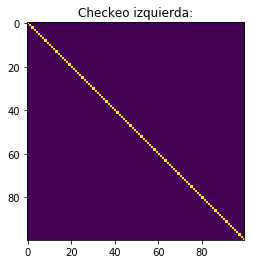

In [66]:
n=100
A=np.random.randint(-5,5,(n,n))
I=np.identity(n)

GJ = GaussJordan(np.c_[A,I])

Ainv=GJ[:,-n:]

plt.figure()
plt.title('Checkeo derecha:')
plt.imshow(np.dot(A,Ainv))

plt.figure()
plt.title('Checkeo izquierda:')
plt.imshow(np.dot(Ainv,A))

# Determinantes

1. Si $A=[a] \to \det[A]=a$
2. Si $A \in \mathcal{M}_{n\times n}$ 
3. Calculamos los determanintes de las matrices reducidas $M_{ij}$ eliminando la fila $i$ y la columna $j$ de $A$
4. Calculamos el cofactor $C_{ij}=(-1)^{i+j}M_{ij}$
5. Fijamos una fila $i$ para hacer el barrido y finalmente:

$$\det[A]=\sum_j a_{ij} C_{ij}$$

In [67]:
A=[[1, 2, 1],
   [2, 4, 3],
   [3, 3, 1]]
A=np.array(A)

In [68]:
def Det(A):
    B=np.copy(A)
    B=B.astype('float64')
    
    n=len(B)
    
    if n==1:
        return B[0,0]

    krow=np.delete(range(n),0)
    
    det=0
    for j in range(n):
        kcol=np.delete(range(n),j)
        M=B[krow,:][:,kcol]
        
        det+=B[0,j]*((-1)**j)*Det(M)
    
    return det 


print('Matriz :\n',A)
print('Determinante calculado:', Det(A))
print('Determinante de numpy:', np.linalg.det(A))


Matriz :
 [[1 2 1]
 [2 4 3]
 [3 3 1]]
Determinante calculado: 3.0
Determinante de numpy: 2.9999999999999996


In [72]:
n=10
A=np.random.randint(-5,5,(n,n))

print('Matriz :\n',A)
#print('Determinante calculado:', Det(A))
print('Determinante de numpy:', np.linalg.det(A))


Matriz :
 [[ 1 -2  1  3 -4  1 -5  2 -2 -5]
 [-2 -3  2 -1 -2 -2 -3  4  1 -3]
 [-5  2  0 -3 -3  1  4  2  0 -2]
 [ 0  2  2  4 -1  3 -2 -3  2  3]
 [-5 -2  3 -2 -5 -4 -4 -5 -5 -2]
 [ 4 -5 -5 -1  0 -3  4 -1 -2 -2]
 [-3  1 -1  4  3 -5  2  0 -5 -1]
 [ 0 -3 -4  3  2 -1 -1  4 -5  2]
 [-3 -4  4  3  2  0 -3  0 -2  2]
 [ 4  4  3  0 -1  1 -1  2  4  4]]
Determinante de numpy: -200843449.9999995


In [25]:
def EigenPol(A,x):
    n=len(A)
    I=np.identity(n)
    
    B=A-x*I
    
    return Det(B)

A=[[0,1,0],
   [1,0,1],
   [0,1,0]]

#Matriz x de Pauli 3x3
#A=np.array(A)/(np.sqrt(2))

#xmin=-1.5
#xmax=1.5
#x=np.linspace(xmin,xmax,100)
#y=np.zeros(100)
#for i in range(100):
#    y[i]=EigenPol(A,x[i])

#plt.title('Polinomio Característico')
#plt.plot(x,y)
#plt.plot([-1,0,1],[0,0,0],'o')
#plt.hlines(0,xmin,xmax)
#plt.xlabel('$x$');